In [1]:
import csv
import networkx as nx
import numpy as np
import math

In [2]:
# Reading CSV
G = nx.Graph()
pos, site = {}, {}

#  Getting the labels
with open('CSV/first_graph/nodes_cost266.csv', 'r') as f_node:
    reader = csv.DictReader(f_node, delimiter=';', quotechar="'")
    for row in reader:
        node = int(row['node'])
        site_node = row['site']
        x_coord, y_coord = float(row['X']), float(row['Y'])
        G.add_node(node,site=site_node)
        pos[node], site[node] = [x_coord,y_coord], site_node

with open('CSV/first_graph/edges_cost266.csv', 'r') as f_edge:
    reader = csv.DictReader(f_edge, delimiter=';', quotechar="'")
    for row in reader:
        nodeA, nodeB = int(row['nodeA']), int(row['nodeB'])
        G.add_edge(nodeA,nodeB)        
        G[nodeA][nodeB]['capa'], G[nodeA][nodeB]['weight'] = float(row['capa']), float(row['cost'])
        
capa = {}
for (u,v) in G.edges():
    capa[(u,v)], capa[(v,u)] = G[u][v]['capa'], G[u][v]['capa']

#  Getting the demands
K = nx.DiGraph()
with open('CSV/first_graph/demand_cost266.csv', 'r') as f_demand:
    reader = csv.DictReader(f_demand, delimiter=';', quotechar="'")
    for row in reader:
        nodeA = int(row['nodeA'])
        nodeB = int(row['nodeB'])
        if nodeA > nodeB:
            nodeA, nodeB = nodeB, nodeA  
        K.add_edge(nodeA,nodeB)                    
        K[nodeA][nodeB]['demand'] = float(row['demand'])/25.

# Information on the network
print('The network has', G.number_of_nodes(),'nodes and', G.number_of_edges(), 'edges.')
print('There are', K.number_of_edges(),'demands.')

The network has 37 nodes and 57 edges.
There are 36 demands.


In [3]:
# Computing the shortest path satisfying a demand chosen randomly in K
n = np.random.randint(0, K.number_of_edges())
demand = list(K.edges)[n]

s_path = nx.shortest_path(G, source=demand[0], target=demand[1])
s_path_edges = zip(s_path,s_path[1:])
s_path_edges = set(s_path_edges)
# When the weights are specified in the CSV file, by default all weights are set to one
w_path = nx.shortest_path(G, source=demand[0], target=demand[1], weight='weight')
w_path_edges = zip(w_path,w_path[1:])
w_path_edges = set(w_path_edges)

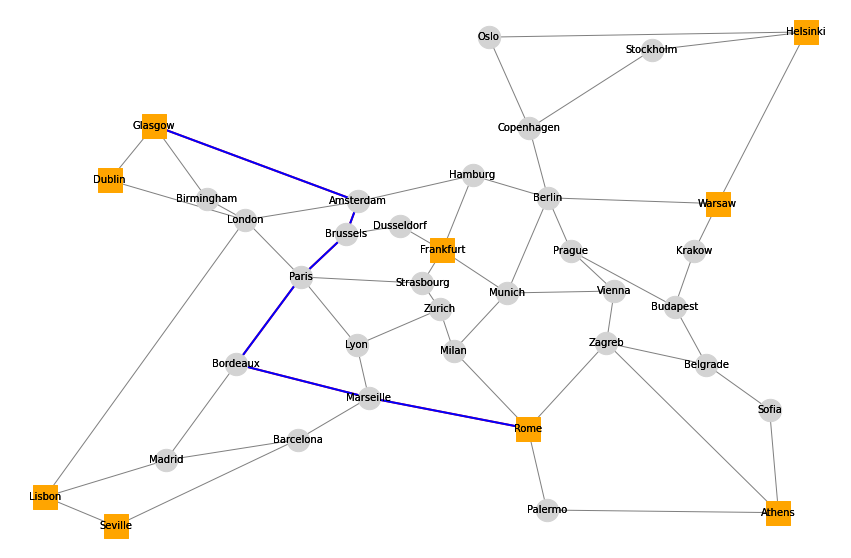

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Creating a figure
plt.figure(figsize=(15,10));
plt.axis('off')

# Plotting the network
nx.draw_networkx_labels(G,pos,labels=site,font_size=10,font_color='black')
nx.draw(G, pos=pos, node_size=500, node_color='lightgrey', edge_color='grey')
nx.draw_networkx_labels(K,pos,labels=site,font_size=10,font_color='black')  
nx.draw_networkx_nodes(K, pos=pos, node_size=600, node_color='orange',node_shape='s')

# Plotting the shortest paths without and with weights
nx.draw_networkx_edges(G,pos,edgelist=s_path_edges,edge_color='r',width=2) #red no wieghts
nx.draw_networkx_edges(G,pos,edgelist=w_path_edges,edge_color='b',width=2) #blue with weights
plt.show()

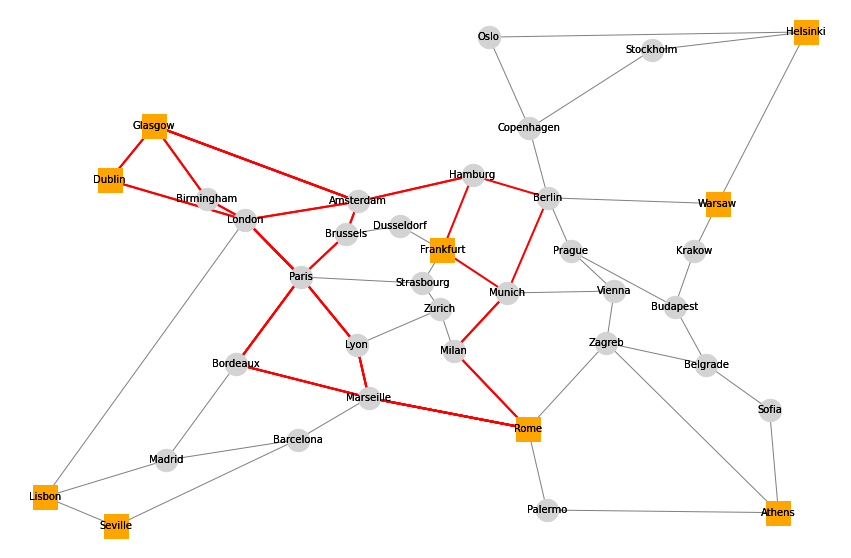

In [5]:
plt.figure(figsize=(15,10));
plt.axis('off')

nx.draw_networkx_labels(G,pos,labels=site,font_size=10,font_color='black')
nx.draw(G, pos=pos, node_size=500, node_color='lightgrey', edge_color='grey')
nx.draw_networkx_labels(K,pos,labels=site,font_size=10,font_color='black')  
nx.draw_networkx_nodes(K, pos=pos, node_size=600, node_color='orange',node_shape='s')

# Computing and plotting all unweighted shortest paths
a_paths = nx.all_shortest_paths(G, demand[0], demand[1])
for path in a_paths:
    path_edges = zip(path,path[1:])
    path_edges = set(path_edges) 
    nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=2)

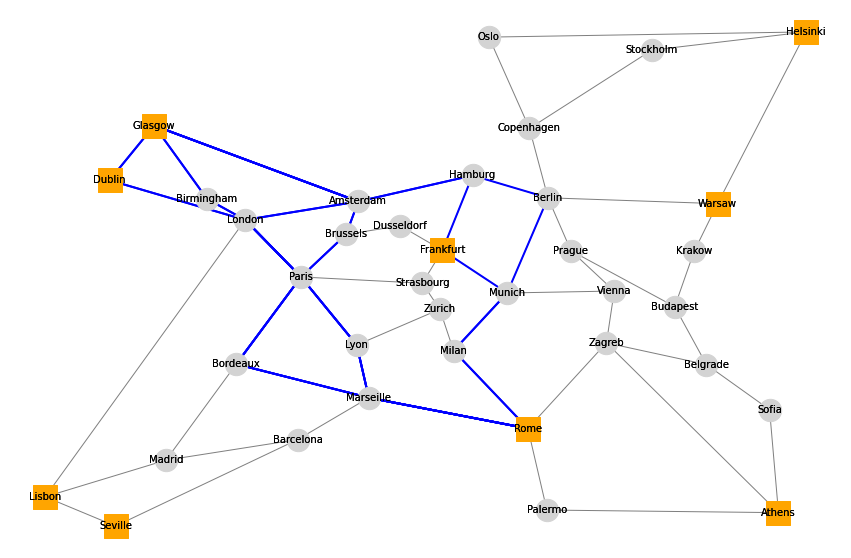

In [6]:
plt.figure(figsize=(15,10));
plt.axis('off')

nx.draw_networkx_labels(G,pos,labels=site,font_size=10,font_color='black')
nx.draw(G, pos=pos, node_size=500, node_color='lightgrey', edge_color='grey')
nx.draw_networkx_labels(K,pos,labels=site,font_size=10,font_color='black')  
nx.draw_networkx_nodes(K, pos=pos, node_size=600, node_color='orange',node_shape='s')

# Same with weighted edges
a_paths = nx.all_shortest_paths(G, demand[0], demand[1], weight='weight')
for path in a_paths:
    path_edges = zip(path,path[1:])
    path_edges = set(path_edges) 
    nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='b',width=2)

In [7]:
#Some more information on the chosen demand
print('The demand from', G.nodes[demand[0]]['site'], 'to', G.nodes[demand[1]]['site'], 'is', K[demand[0]][demand[1]]['demand'])

The demand from Glasgow to Rome is 47.84


In [8]:
# Finding the minimum capacity along the shortest paths
a_paths = nx.all_shortest_paths(G, demand[0], demand[1], weight='weight')

for i, path in enumerate(a_paths):
    path_edges = zip(path,path[1:])
    path_edges = set(path_edges)
    min_capa = min(G.edges[edge]['capa'] for edge in path_edges)
    print('Capacity along path', i+1, 'is', min_capa)
    if min_capa > K[demand[0]][demand[1]]['demand']:
        print('The path can deliver the demand')
    else:
        print('The path cannot deliver the demand')
    print('-------------------------------')

Capacity along path 1 is 50.0
The path can deliver the demand
-------------------------------
Capacity along path 2 is 50.0
The path can deliver the demand
-------------------------------
Capacity along path 3 is 50.0
The path can deliver the demand
-------------------------------
Capacity along path 4 is 50.0
The path can deliver the demand
-------------------------------
Capacity along path 5 is 200.0
The path can deliver the demand
-------------------------------
Capacity along path 6 is 150.0
The path can deliver the demand
-------------------------------
Capacity along path 7 is 50.0
The path can deliver the demand
-------------------------------
Capacity along path 8 is 100.0
The path can deliver the demand
-------------------------------
Capacity along path 9 is 150.0
The path can deliver the demand
-------------------------------
Capacity along path 10 is 100.0
The path can deliver the demand
-------------------------------


In [9]:
# First IGP implementation
def IGP(G, K, i):
    """
    Given a graph G, demands K and demand number i returns the flows and the maximum load
    """
    
    # Initiate the constants
    dem = list(K.edges)[i]
    dem_val = K[dem[0]][dem[1]]['demand']
    flows, load, M = {}, 0, 0
    
    # Compute shortest paths
    a_paths = nx.all_shortest_paths(G, dem[0], dem[1], weight='weight')
    a_paths = list(a_paths)
    n_paths = len(a_paths)
    
    for path in a_paths:
        for i in range(len(path)-1):
            if (path[i], path[i+1]) in flows:
                flows[(path[i], path[i+1])] += 1/n_paths
            else:
                flows[(path[i], path[i+1])] = 1/n_paths
    
    # Compute the maximum load
    for (u,v) in flows:
        M = flows[(u,v)]/G[u][v]['capa']
        if M > load:
            load = M
    return flows, load*dem_val

In [10]:
# Testing on the chosen demand
print(IGP(G, K, n))

({(14, 1): 0.6, (1, 8): 0.2, (8, 27): 0.2, (27, 7): 0.4, (7, 22): 0.4, (22, 29): 0.7999999999999999, (1, 19): 0.2, (19, 27): 0.6, (14, 6): 0.2, (6, 19): 0.2, (14, 11): 0.2, (11, 19): 0.2, (27, 20): 0.4, (20, 22): 0.4, (1, 15): 0.2, (15, 5): 0.1, (5, 24): 0.1, (24, 23): 0.2, (23, 29): 0.2, (15, 13): 0.1, (13, 24): 0.1}, 0.38272000000000006)


In [11]:
def IGP_tot(G, K):
    """
    Returns the maximum load in graph G amongst all demands K with respect to IGP
    """
    flows_tot, load = {}, 0
    for i in range(K.number_of_edges()):
        flows, M = IGP(G, K, i)
        flows_tot[i] = flows
        if M > load:
            load = M
    return flows_tot, load

In [12]:
#Getting the maximum load per demand with respect to this IGP
flows, load = IGP_tot(G,K)
print(load)

0.632


In [13]:
# We will need forward and backward tables for the ECMP implementation
def forward_table(G, K, i):
    """
    Given a graph G, demands K and demand number i 
    returns the forward table amongst shortest paths in G satisfying the demand
    """
    dem = list(K.edges)[i]
    dem_val = K[dem[0]][dem[1]]['demand']
    a_paths = list(nx.all_shortest_paths(G, dem[0], dem[1], weight='weight'))
    
    table = {}
    for path in a_paths:
        for i in range(len(path)-1):
            if path[i] in table:
                if path[i+1] not in table[path[i]]:
                    table[path[i]].append(path[i+1])
            else:
                table[path[i]] = [path[i+1]]
    table[dem[1]] = ['t']
    return table

def backward_table(G, K, i):
    """
    Given a graph G, demands K and demand number i 
    returns the forward table amongst shortest paths in G satisfying the demand
    """
    dem = list(K.edges)[i]
    dem_val = K[dem[0]][dem[1]]['demand']
    a_paths = list(nx.all_shortest_paths(G, dem[0], dem[1], weight='weight'))
    
    table = {}
    table[dem[0]] = ['s']
    for path in a_paths:
        for i in range(len(path)-1):
            if path[i+1] in table:
                if path[i] not in table[path[i+1]]:
                    table[path[i+1]].append(path[i])
            else:
                table[path[i+1]] = [path[i]]
    return table

In [14]:
# Testing them on the chosen demand
print('formward :{}, \n backward : {}'.format(forward_table(G, K, n), backward_table(G, K, n)))

formward :{14: [1, 6, 11], 1: [8, 19, 15], 8: [27], 27: [7, 20], 7: [22], 22: [29], 19: [27], 6: [19], 11: [19], 20: [22], 15: [5, 13], 5: [24], 24: [23], 23: [29], 13: [24], 29: ['t']}, 
 backward : {14: ['s'], 1: [14], 8: [1], 27: [8, 19], 7: [27], 22: [7, 20], 29: [22, 23], 19: [1, 6, 11], 6: [14], 11: [14], 20: [27], 15: [1], 5: [15], 24: [5, 13], 23: [24], 13: [15]}


In [15]:
def ECMP(G, K, i):
    """
    Given a grapg G, demands K and demand number i
    returns the ECMP satisfying the demands on the shortest paths
    """
    # Compute the forward and backward tables
    f_table, b_table = forward_table(G, K, i), backward_table(G, K, i)
    
    # Initiate the constants
    dem = list(K.edges)[i]
    dem_val = K[dem[0]][dem[1]]['demand']
    flow, load, M = {}, 0, 0
    
    # Computing the flow branchements
    flow[('s', list(f_table)[0])] = 1
    for nodeA in f_table:
        for nodeB in f_table[nodeA]:
            flow[(nodeA, nodeB)] = 0
    while(flow[(list(f_table)[-1], 't')] != 1):
        for nodeA in f_table:
            for nodeB in f_table[nodeA]:
                in_flow = 0
                for nodeC in b_table[nodeA]:
                    in_flow += flow[(nodeC, nodeA)]
                flow[(nodeA, nodeB)] = in_flow/len(f_table[nodeA])

    del flow[('s', list(f_table)[0])]
    del flow[(list(f_table)[-1], 't')]
   
    # Compute the maximum load
    for (u,v) in flow:
        M = flow[(u,v)]/G[u][v]['capa']
        if M > load:
            load = M
    return flow, load*dem_val

In [16]:
# Testing on the chosen demand
ECMP(G, K, n)

({(14, 1): 0.3333333333333333,
  (14, 6): 0.3333333333333333,
  (14, 11): 0.3333333333333333,
  (1, 8): 0.1111111111111111,
  (1, 19): 0.1111111111111111,
  (1, 15): 0.1111111111111111,
  (8, 27): 0.1111111111111111,
  (27, 7): 0.4444444444444444,
  (27, 20): 0.4444444444444444,
  (7, 22): 0.4444444444444444,
  (22, 29): 0.8888888888888888,
  (19, 27): 0.7777777777777777,
  (6, 19): 0.3333333333333333,
  (11, 19): 0.3333333333333333,
  (20, 22): 0.4444444444444444,
  (15, 5): 0.05555555555555555,
  (15, 13): 0.05555555555555555,
  (5, 24): 0.05555555555555555,
  (24, 23): 0.1111111111111111,
  (23, 29): 0.1111111111111111,
  (13, 24): 0.05555555555555555},
 0.4252444444444445)

In [17]:
def ECMP_tot(G, K):
    """
    Returns the maximum load in graph G amongst all demands K with respect to ECMP
    """
    flows_tot, load = {}, 0
    for i in range(K.number_of_edges()):
        flows, M = ECMP(G, K, i)
        flows_tot[i] = flows
        if M > load:
            load = M
    return flows_tot, load 

In [18]:
flows, load_ECMP = ECMP_tot(G, K)
for key in flows:
    print('demande {} : {}'.format(key, flows[key]))

demande 0 : {(2, 26): 0.5, (2, 36): 0.5, (26, 29): 0.5, (29, 22): 1.0, (22, 7): 0.5, (22, 20): 0.5, (7, 27): 0.5, (27, 19): 1.0, (19, 11): 1.0, (36, 29): 0.5, (20, 27): 0.5}
demande 1 : {(2, 36): 1.0, (36, 34): 1.0, (34, 24): 1.0, (24, 13): 1.0}
demande 2 : {(2, 36): 1.0, (36, 34): 1.0, (34, 24): 0.5, (34, 28): 0.5, (24, 5): 0.25, (24, 13): 0.25, (5, 15): 0.75, (15, 1): 1.0, (1, 14): 1.0, (28, 5): 0.5, (13, 15): 0.25}
demande 3 : {(2, 36): 0.5, (2, 31): 0.5, (36, 4): 0.25, (36, 34): 0.25, (4, 9): 0.75, (9, 17): 0.75, (17, 35): 0.75, (35, 16): 1.0, (31, 4): 0.5, (34, 24): 0.125, (34, 28): 0.125, (24, 5): 0.125, (5, 35): 0.25, (28, 5): 0.125}
demande 4 : {(2, 26): 0.5, (2, 36): 0.5, (26, 29): 0.5, (29, 22): 1.0, (22, 3): 0.5, (22, 7): 0.5, (3, 30): 0.25, (3, 21): 0.25, (30, 18): 0.25, (36, 29): 0.5, (21, 18): 0.75, (7, 21): 0.5}
demande 5 : {(2, 26): 0.5, (2, 36): 0.5, (26, 29): 0.5, (36, 29): 0.5}
demande 6 : {(2, 26): 0.5, (2, 36): 0.5, (26, 29): 0.5, (29, 22): 1.0, (22, 3): 1.0, (3, 3

In [19]:
def total_flow(G, K):
    """
    Adds up the flows returned by the ECMP_tot(G, K) along all edges of the network G
    """
    flows, H = {}, nx.DiGraph(G)
    for (u, v) in list(H.edges):
        flows[(u,v)] = 0
    for k in range(K.number_of_edges()):
        flows_k, M = ECMP(G, K, k)
        dem = list(K.edges)[k]
        dem_val = K[dem[0]][dem[1]]['demand']
        for key in flows_k:
            flows[key] += flows_k[key]*dem_val
    return flows

In [20]:
flows = total_flow(G, K)

In [22]:
H = nx.DiGraph(G)
for (u,v) in list(H.edges()):
    print('link ({0:10s},{1:10s}):\tflow = {2:8f} / capacity = {3:8f} -> load = {4:.2f} %'.format(site[u],site[v],flows[(u, v)],H[u][v]['capa'],100*flows[(u,v)]/H[u][v]['capa']))

link (Amsterdam ,Brussels  ):	flow = 5.315556 / capacity = 200.000000 -> load = 2.66 %
link (Amsterdam ,London    ):	flow = 45.935556 / capacity = 250.000000 -> load = 18.37 %
link (Amsterdam ,Glasgow   ):	flow = 70.160000 / capacity = 250.000000 -> load = 28.06 %
link (Amsterdam ,Hamburg   ):	flow = 135.755556 / capacity = 250.000000 -> load = 54.30 %
link (Athens    ,Palermo   ):	flow = 13.640000 / capacity = 300.000000 -> load = 4.55 %
link (Athens    ,Zagreb    ):	flow = 46.760000 / capacity = 250.000000 -> load = 18.70 %
link (Athens    ,Sofia     ):	flow = 9.640000 / capacity = 200.000000 -> load = 4.82 %
link (Barcelona ,Seville   ):	flow = 31.110000 / capacity = 200.000000 -> load = 15.55 %
link (Barcelona ,Madrid    ):	flow = 0.950000 / capacity = 200.000000 -> load = 0.47 %
link (Barcelona ,Marseille ):	flow = 10.260000 / capacity = 200.000000 -> load = 5.13 %
link (Belgrade  ,Budapest  ):	flow = 14.460000 / capacity = 100.000000 -> load = 14.46 %
link (Belgrade  ,Zagreb    )

In [23]:
# To export to CSV
for (u,v) in list(G.edges()):
    print('({},{}); {}'.format(u,v,flows[(u,v)]/H[u][v]['capa']))

(1,8); 0.02657777777777778
(1,19); 0.18374222222222222
(1,14); 0.28064
(1,15); 0.5430222222222223
(2,26); 0.04546666666666666
(2,36); 0.18704
(2,31); 0.04819999999999999
(3,30); 0.15555
(3,21); 0.00475
(3,22); 0.0513
(4,9); 0.14459999999999998
(4,36); 0.0
(4,31); 0.0
(5,24); 0.06438518518518518
(5,10); 0.0
(5,35); 0.9922400000000001
(5,28); 0.0
(5,15); 0.08335000000000001
(6,19); 0.6733333333333333
(6,14); 0.0
(7,27); 0.0144
(7,21); 0.0076
(7,22); 0.10896888888888889
(8,27); 0.01771851851851852
(8,12); 0.0
(9,17); 0.0482
(9,28); 0.0
(10,32); 0.0
(10,25); 0.0
(11,19); 0.5172666666666665
(11,14); 0.1231
(12,13); 0.0
(13,24); 0.3739888888888889
(13,33); 0.054066666666666666
(13,15); 1.0845
(16,32); 0.0
(16,25); 0.0
(16,35); 0.0916
(17,35); 0.0964
(18,19); 0.8056
(18,21); 0.0342
(18,30); 0.2992
(19,27); 0.29205925925925924
(20,27); 0.0036
(20,37); 0.0
(20,22); 0.11911111111111111
(22,29); 0.24529777777777778
(23,24); 0.2656
(23,29); 0.34930370370370367
(23,37); 0.0
(24,34); 0.0
(26,29); 0.

In [24]:
from pyomo.opt import SolverStatus, TerminationCondition
from pyomo.environ import *
import sys, time

In [25]:
def compute_distances(G):
    dist = {}
    for (u, v) in list(G.edges()):
        dist[(u,v)] = math.sqrt((pos[u][0]-pos[v][0])**2+(pos[u][1]-pos[v][1])**2)
    return dist

In [26]:
# Defining the constraints
def flowConservation(model, node, o, d):
    # Computing the in and out flows
    in_flow = sum(model.flow[i,j,o,d] for (i,j) in model.arcs if j == node)
    out_flow = sum(model.flow[i,j,o,d] for (i,j) in model.arcs if i == node)
    if node == o:
        return (in_flow - out_flow + K[o][d]['demand'] == 0)
    elif node == d:
        return (in_flow - out_flow - K[o][d]['demand'] == 0) 
    else:
        return (in_flow == out_flow)

def linkCapacity(model, i, j):
    return sum(model.flow[i,j,o,d] + model.flow[j,i,o,d] for (o,d) in model.demands)<= model.capa[i,j] * model.gamma

In [27]:
def optimize(G, K, solver='glpk', time_constraint=False, T_max=7000, verbose=True, csv=False, nice_print=False):
    # Set the optimisation model
    if verbose : print('>>> Loading optimisation model')
        
    model = ConcreteModel()
    model.dual = Suffix(direction=Suffix.IMPORT)

    # Defining the parameters of the program
    model.nodes = Set(initialize=list(H.nodes))
    model.links = Set(initialize=list(G.edges()),dimen=2)
    model.arcs  = Set(initialize=list(H.edges()),dimen=2)
    model.demands = Set(initialize=list(K.edges()),dimen=2)
    model.x1 = Set(initialize = [(u, o, d) for u in model.nodes for (o,d) in model.demands])
    model.x2 = Set(initialize = [(u, v, o, d) for (u,v) in model.arcs for (o,d) in model.demands])
    model.capa = Param(model.arcs,initialize=capa)
    if verbose : print('Parmaters : ok')
        
    # Defining the variables of the program
    model.flow = Var(model.x2, domain=NonNegativeReals)
    model.gamma = Var(domain=NonNegativeReals)
    if verbose : print('Variables : ok')

    # Defining the constraints of the model
    model.flowConserv = Constraint(model.x1, rule=flowConservation)    
    model.linkCapa = Constraint(model.links, rule=linkCapacity)
    if time_constraint:
        dist = compute_distances(G)
        model.time = Constraint(expr=sum(dist[(u,v)]*model.flow[u,v,o,d] for (u,v) in dist.keys() for (o,d) in  model.demands) <= T_max)
    if verbose : print('Constraints : ok')

    # Defining the objective of the model, ie the function we will minimise under the constraints
    model.objective = Objective(rule=lambda m: m.gamma, sense=minimize)
    
    # Running the actual optimisation
    if verbose : print('>>> Solving optimisation model')
    
    model.preprocess()
    optim = SolverFactory(solver)
    start_time = time.time()
    results = optim.solve(model)
    cpu_time = time.time() - start_time

    # Printing the final results
    print('+ Termination Status:',results.solver.status)
    print('+ Termination Condition:',results.solver.termination_condition)
    print('+ CPU  time = {0:.2f} s'.format(cpu_time))
    if results.solver.status == SolverStatus.ok and results.solver.termination_condition != TerminationCondition.infeasible:
        print('+ Optimal Value  = {0:.8f}'.format(model.gamma.value))
        print('+ Lower bound  = {0:.2f}'.format(results.Problem._list[0]['Lower bound']))
    
    if csv :
        # To export to CSV
        print('\n')
        epsilon = 1.0e-06

        for (u,v) in G.edges():
            TotalFlow = 0.0
            for (o,d) in K.edges():
                TotalFlow += model.flow[u,v,o,d].value
                TotalFlow += model.flow[v,u,o,d].value
            G[u][v]['flow'] = TotalFlow    
            if TotalFlow > epsilon:
                print('({},{}); {}'.format(u,v,TotalFlow/model.capa[(u,v)]))
    
    if nice_print:
        # Printing the results in a readable form
        print('\n')
        epsilon = 1.0e-06
        for (o,d) in K.edges():
            print('demand ({0:s},{1:s}): {2:f}'.format(site[o],site[d],K[o][d]['demand']*model.gamma.value))
            for (u,v) in model.arcs:
                if model.flow[u,v,o,d].value > epsilon:
                    print('\tarc ({0:s},{1:s}): flow = {2:f}'.format(site[u],site[v],model.flow[u,v,o,d].value))
    return

In [28]:
optimize(G, K, time_constraint=True)

>>> Loading optimisation model
Parmaters : ok
Variables : ok
Constraints : ok
>>> Solving optimisation model
+ Termination Status: ok
+ Termination Condition: optimal
+ CPU  time = 0.37 s
+ Optimal Value  = 0.93437010
+ Lower bound  = 0.93
